In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Данные о людях с лишним весом

In [40]:
path = r'C:\Users\Pavlov Denis\Desktop\Projects\lightpersons.csv'
df = pd.read_csv(path, encoding='utf-8', sep=',')
df

,client,sex,age,height,weight(before),nutrition,training,weight(after)
0,Jonhson A.,1,61,179,99,35,42,94
1,Peterson Y.,1,42,188,120,170,10,108
2,Henderson O.,1,54,173,95,150,80,86
3,White A.,0,33,167,95,50,15,87
4,Parker E.,0,24,162,94,319,110,63
5,Show L.,0,40,170,105,20,20,106
6,Phelps M.,0,29,168,125,200,80,108
7,Panda L.,0,22,163,89,200,20,78
8,Brown S.,1,45,182,175,336,100,130
9,Nellion L.,1,22,170,105,245,75,95


### sex - пол(0 - женщина, 1 - мужчина)

### nutrition - диета(0 - без контроля питания, 1 - кето диеты)

### training - групповые тренировки(0 - без тренировок, 1 - тренировки по пилатесу 2 раза в неделю)            

In [41]:
def ind_of_weight(weight, height):
    '''вычисляет и возвращает индекс массы тела'''
    return round(weight / (height/100)**2, 1)


ИНДЕКС МАССЫ ТЕЛА(ИМТ)
ИМТ < 18.5:	Ниже нормального веса
ИМТ >= 18.5 И < 25:	Нормальный вес
ИМТ >= 25 И < 30:	Избыточный вес
ИМТ >= 30 И < 35:	Ожирение I степени
ИМТ >= 35 И < 40:	Ожирение II степени
ИМТ >= 40:	Ожирение III степени

In [42]:
df['body_mass_index(before)'] = ind_of_weight(df['weight(before)'], df['height'])
df['body_mass_index(after)'] = ind_of_weight(df['weight(after)'], df['height'])
df['result'] = df['body_mass_index(before)'] - df['body_mass_index(after)'] 
df

,client,sex,age,height,weight(before),nutrition,training,weight(after),body_mass_index(before),body_mass_index(after),result
0,Jonhson A.,1,61,179,99,35,42,94,30.9,29.3,1.6
1,Peterson Y.,1,42,188,120,170,10,108,34.0,30.6,3.4
2,Henderson O.,1,54,173,95,150,80,86,31.7,28.7,3.0
3,White A.,0,33,167,95,50,15,87,34.1,31.2,2.9
4,Parker E.,0,24,162,94,319,110,63,35.8,24.0,11.8
5,Show L.,0,40,170,105,20,20,106,36.3,36.7,-0.4
6,Phelps M.,0,29,168,125,200,80,108,44.3,38.3,6.0
7,Panda L.,0,22,163,89,200,20,78,33.5,29.4,4.1
8,Brown S.,1,45,182,175,336,100,130,52.8,39.2,13.6
9,Nellion L.,1,22,170,105,245,75,95,36.3,32.9,3.4


In [43]:

def regression(x, y, xlabel='', ylabel=''):
    # найдем коэффициенты регрессии a и b
    b = (np.mean(x*y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x)**2)
    a = np.mean(y) - b * np.mean(x)
    # Найдем койффициент корреляции
    r = b * np.std(x) / np.std(y)
    print(r)
    # построим график
    plt.scatter(x, y)
    plt.plot(x, a + b * x)
    plt.title(f'r = {r}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)


0.8114682032078656


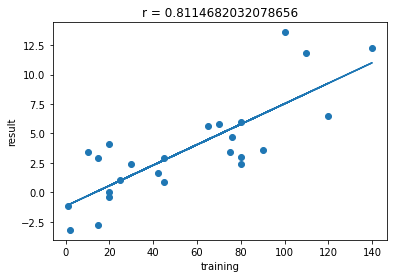

In [44]:
regression(df['training'], df['result'], xlabel='training', ylabel='result')

0.8957043719113204


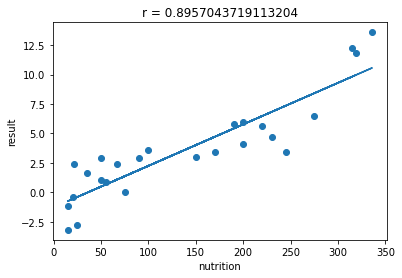

In [45]:
regression(df['nutrition'], df['result'], xlabel='nutrition', ylabel='result')

In [46]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [47]:

model = ols('result~C(nutrition) + C(training)', data=df[['nutrition', 'training', 'result']]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 result   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 22 Jan 2023   Prob (F-statistic):                nan
Time:                        22:33:19   Log-Likelihood:                 779.65
No. Observations:                  25   AIC:                            -1509.
Df Residuals:                       0   BIC:                            -1479.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.2000    